In [2]:
import datetime
import itertools
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline

In [ ]:
# load the target dataset.
(train_X, train_Y), (test_X, test_Y) = cifar10.load_data()   
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170508288/170498071 [==============================] - 11s 0us/step


In [ ]:
# Reshape to the form satiable to KNN model structure.
train_X = train_X.reshape(-1,3072)
train_Y = train_Y.reshape(-1,)
test_X = test_X.reshape(-1,3072)
test_Y = test_Y.reshape(-1,)

In [ ]:
print('train_X shape:', train_X.shape)
print('train_Y shape:', train_Y.shape)
print('test_X shape:', test_X.shape)
print('test_Y shape:', test_Y.shape)
print('label_names:', label_names)

train_X shape: (50000, 3072)
train_Y shape: (50000,)
test_X shape: (10000, 3072)
test_Y shape: (10000,)
label_names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [ ]:
# Apply PCA for feature extraction.
t0 = datetime.datetime.now()

pca = PCA(n_components=0.95)
pca.fit(train_X, train_Y)

train_X_pca = pca.transform(train_X)
test_X_pca = pca.transform(test_X)

to = datetime.datetime.now() - t0
print('PCA runtime:', to)

PCA runtime: 0:01:47.780240


In [ ]:
print('train_X_pca shape:', train_X_pca.shape)
print('test_X_pca shape:', test_X_pca.shape)

train_X_pca shape: (50000, 217)
test_X_pca shape: (10000, 217)


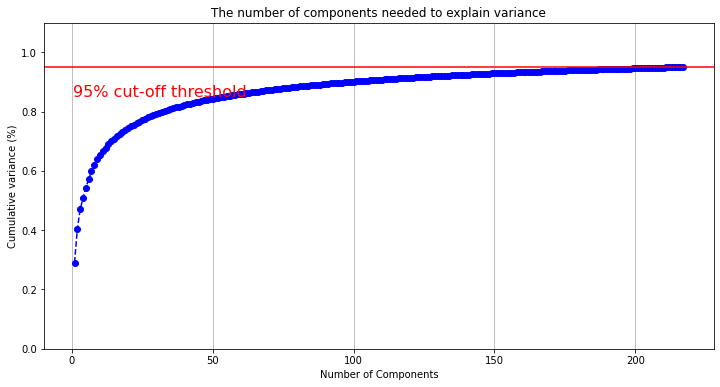

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 218, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
#plt.xticks(np.arange(0, 217, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [ ]:
### Construct KNN model employment.
result=[]
for i in [1, 5, 10, 15, 20, 25 ,30 ,40 ,50, 60, 70, 80, 90, 100]:
  clf = KNeighborsClassifier(n_neighbors=i,
                           weights='distance',     #{distance, uniform}
                           algorithm = 'auto'
                           )
  # execute the 10-fold cross validation exercise in training dataset.
  t0 = datetime.datetime.now()
  CV_accuracy_score = cross_val_score(clf, train_X_pca, train_Y, cv=10, scoring = 'accuracy')
  average_accuracy = np.mean(CV_accuracy_score)
  to = datetime.datetime.now() - t0
  #print('When K =',i,'The accuracy score is' average_accuracy)
  t0 = datetime.datetime.now() 
  clf = clf.fit(train_X_pca, train_Y)
  pred_Y = clf.predict(test_X_pca)
  to = datetime.datetime.now() - t0
  print('When K =',i,'The accuracy score is',accuracy_score(test_Y, pred_Y))
  result.append(accuracy_score(test_Y, pred_Y))

       


When K = 1 The accuracy score is 0.3708
When K = 5 The accuracy score is 0.379
When K = 10 The accuracy score is 0.3787
When K = 15 The accuracy score is 0.3744
When K = 20 The accuracy score is 0.3678
When K = 25 The accuracy score is 0.3621
When K = 30 The accuracy score is 0.3583
When K = 40 The accuracy score is 0.3516
When K = 50 The accuracy score is 0.347
When K = 60 The accuracy score is 0.3431
When K = 70 The accuracy score is 0.341
When K = 80 The accuracy score is 0.3388
When K = 90 The accuracy score is 0.3374
When K = 100 The accuracy score is 0.3342


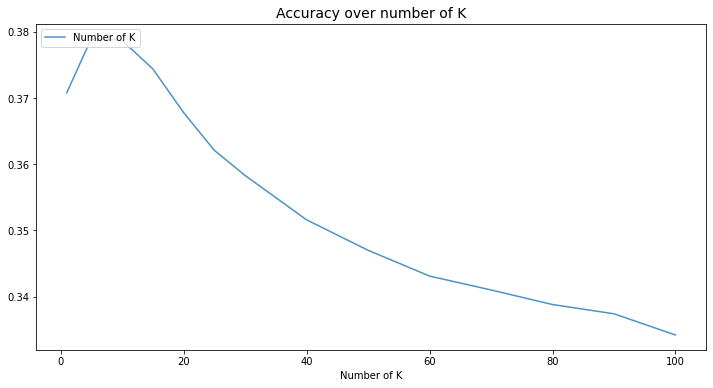

In [ ]:
#II.8 plot learning curve
import keras
from matplotlib import pyplot as plt
my_x_ticks = [1, 5, 10, 15, 20, 25 ,30 ,40 ,50, 60, 70, 80, 90, 100]
plt.title("Accuracy over number of K", fontsize=14)
plt.xlabel('Number of K')
plt.plot(my_x_ticks,result, alpha=0.8, label='Number of K')
plt.legend(loc='upper left')
plt.show()

KNN runtime: 0:02:37.677229


average_accuracy: 0.41224
average_precision: 0.4561455146615049
average_recall: 0.41224
average_f1: 0.4072990539394853


test runtime: 0:00:08.637520


In [ ]:
clf = KNeighborsClassifier(n_neighbors=5,
                           weights='distance',     #{distance, uniform}
                           algorithm = 'auto'
                           )
# execute the 10-fold cross validation exercise in training dataset.
t0 = datetime.datetime.now()
CV_accuracy_score = cross_val_score(clf, train_X_pca, train_Y, cv=10, scoring = 'accuracy')
average_accuracy = np.mean(CV_accuracy_score)
to = datetime.datetime.now() - t0
#print('When K =',i,'The accuracy score is' average_accuracy)
t0 = datetime.datetime.now() 
clf = clf.fit(train_X_pca, train_Y)
pred_Y = clf.predict(test_X_pca)
to = datetime.datetime.now() - t0
print('When K =5The accuracy score is',accuracy_score(test_Y, pred_Y))


When K =5The accuracy score is 0.379


In [ ]:
def plot_confusion_matrix(cm, classes, normalize, title):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.binary)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    title_font = {'family': 'serif', 'color': 'black', 'weight': 'bold', 'size': 15}
    label_font = {'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 10}
    plt.title(title, fontdict=title_font)
    plt.ylabel('True label',fontdict=label_font)
    plt.xlabel('Predicted label',fontdict=label_font)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()

Test accuracy: 0.379


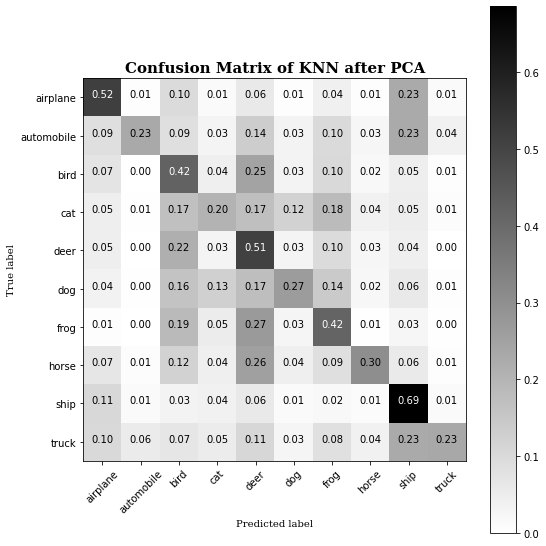

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_Y, pred_Y)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=label_names, normalize=True, 
                      title='Confusion Matrix of KNN after PCA')
print("Test accuracy:",accuracy_score(test_Y, pred_Y))

In [ ]:
#Without PCA
### Construct KNN model employment.
result=[]
for i in [1, 5, 10, 15, 20, 25 ,30 ,40 ,50, 60, 70, 80, 90, 100]:
  clf = KNeighborsClassifier(n_neighbors=i,
                           weights='distance',     #{distance, uniform}
                           algorithm = 'auto'
                           )
  # execute the 10-fold cross validation exercise in training dataset.
  t0 = datetime.datetime.now()
  CV_accuracy_score = cross_val_score(clf, train_X, train_Y, cv=10, scoring = 'accuracy')
  average_accuracy = np.mean(CV_accuracy_score)
  to = datetime.datetime.now() - t0
  #print('When K =',i,'The accuracy score is' average_accuracy)
  t0 = datetime.datetime.now() 
  clf = clf.fit(train_X, train_Y)
  pred_Y = clf.predict(test_X)
  to = datetime.datetime.now() - t0
  print('When K =',i,'The accuracy score is',accuracy_score(test_Y, pred_Y))
  result.append(accuracy_score(test_Y, pred_Y))

       

When K = 1 The accuracy score is 0.3539
When K = 5 The accuracy score is 0.3567
When K = 10 The accuracy score is 0.3513
When K = 15 The accuracy score is 0.3507
When K = 20 The accuracy score is 0.3448
When K = 25 The accuracy score is 0.3405
When K = 30 The accuracy score is 0.3402
When K = 40 The accuracy score is 0.3345
When K = 50 The accuracy score is 0.3284
When K = 60 The accuracy score is 0.3243
When K = 70 The accuracy score is 0.319
When K = 80 The accuracy score is 0.3163
When K = 90 The accuracy score is 0.3166
When K = 100 The accuracy score is 0.313


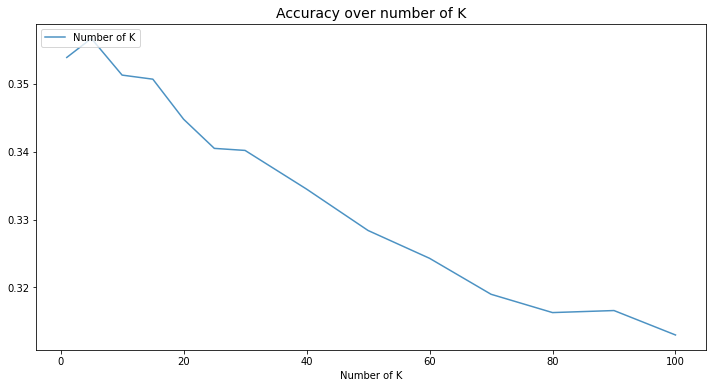

In [ ]:
#II.8 plot learning curve
import keras
from matplotlib import pyplot as plt
my_x_ticks = [1, 5, 10, 15, 20, 25 ,30 ,40 ,50, 60, 70, 80, 90, 100]
plt.title("Accuracy over number of K", fontsize=14)
plt.xlabel('Number of K')
plt.plot(my_x_ticks,result, alpha=0.8, label='Number of K')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#Without PCA
### Construct KNN model employment.
result=[]
for i in [1, 5, 10, 15, 20, 25 ,30 ,40 ,50, 60, 70, 80, 90, 100]:
  clf = KNeighborsClassifier(n_neighbors=i,
                           weights='distance',     #{distance, uniform}
                           algorithm = 'auto'
                           )
  # execute the 10-fold cross validation exercise in training dataset.
  t0 = datetime.datetime.now()
  CV_accuracy_score = cross_val_score(clf, train_X, train_Y, cv=10, scoring = 'accuracy')
  average_accuracy = np.mean(CV_accuracy_score)
  to = datetime.datetime.now() - t0
  #print('When K =',i,'The accuracy score is' average_accuracy)
  t0 = datetime.datetime.now() 
  clf = clf.fit(train_X, train_Y)
  pred_Y = clf.predict(test_X)
  to = datetime.datetime.now() - t0
  print('When K =',i,'The accuracy score is',accuracy_score(test_Y, pred_Y))
  result.append(accuracy_score(test_Y, pred_Y))

       

When K =5The accuracy score is 0.379


In [ ]:
def plot_confusion_matrix(cm, classes, normalize, title):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.binary)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    title_font = {'family': 'serif', 'color': 'black', 'weight': 'bold', 'size': 15}
    label_font = {'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 10}
    plt.title(title, fontdict=title_font)
    plt.ylabel('True label',fontdict=label_font)
    plt.xlabel('Predicted label',fontdict=label_font)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()

Test accuracy: 0.379


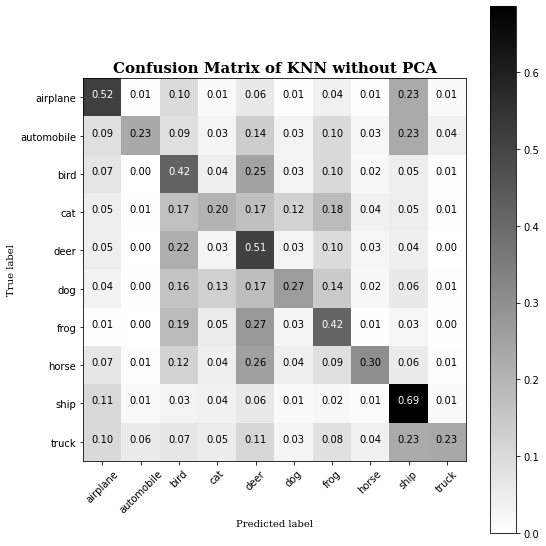

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_Y, pred_Y)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=label_names, normalize=True, 
                      title='Confusion Matrix of KNN without PCA')
print("Test accuracy:",accuracy_score(test_Y, pred_Y))

In [9]:
# Load the CIFAR10 dataset
from keras.datasets import cifar10
classesName = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(xTrain, yTrain), (xTest, yTest) = cifar10.load_data()
xVal = xTrain[49000:, :].astype(np.float)
yVal = np.squeeze(yTrain[49000:, :])
xTrain = xTrain[:49000, :].astype(np.float)
yTrain = np.squeeze(yTrain[:49000, :])
yTest = np.squeeze(yTest)
xTest = xTest.astype(np.float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.float` is a depr

In [10]:
print(xTrain.shape)
print(yTrain.shape)
xTrain = np.reshape(xTrain, (xTrain.shape[0], -1)) # The -1 means that the corresponding dimension is calculated from the other given dimensions.
xVal = np.reshape(xVal, (xVal.shape[0], -1))
xTest = np.reshape(xTest, (xTest.shape[0], -1))
print(xTrain.shape) 
print(xTrain[0])

#Normalize 
xTrain=((xTrain/255)*2)-1 
print(xTrain.shape)
print(xTrain[0])

(49000, 32, 32, 3)
(49000,)
(49000, 3072)
[ 59.  62.  63. ... 123.  92.  72.]
(49000, 3072)
[-0.5372549  -0.51372549 -0.50588235 ... -0.03529412 -0.27843137
 -0.43529412]


In [12]:
#Choosing a smaller dataset
xTrain=xTrain[:3000,:]
yTrain=yTrain[:3000]
print(yTrain)
print(xTrain.shape)
print(yTrain.shape)

[6 9 9 ... 6 6 4]
(3000, 3072)
(3000,)
